In [5]:
from __future__ import annotations
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
from scipy import integrate

In [75]:
# Parameters
class CompetitiveLV:
    def __init__(self, parameters: dict):
        self.r  = parameters['r']  # array of intrinsic growth rates
        self.K  = parameters['K']  # array of carrying capacities
        self.a  = parameters['a']  # array of alpha values (limiting effect of one species on another)
        self.t  = np.arange(0, len(self.r))
        
    def dN_dt(self, N: np.array, t: float = 0) -> np.array:
        """ 
        Calculates the growth rates for all species

        """
        
        dN = np.zeros((len(N), ))
        for i in self.t:
            dN[i] = self.r[i] * N[i] * (1 - ((N[i] + np.sum(self.a[i] * N)) / self.K[i]))
        return dN            
        
    
    def solve(self, ode: Callable, N0: np.array, t: np.array):
        sol = ode(self.dN_dt, N0, t)
        self.plot_results(sol, t)
        return sol
        
    def plot_results(self, 
                     sol: np.array, 
                     t: np.array, 
                     N1_label: str = "Species 1", 
                     N2_label: str = "Species 2", 
                     title:    str = "Populations Over Time"):
        
        plt.plot(t, sol[:, 0], label = "Competitor 1")
        plt.plot(t, sol[:, 1], label = "Competitor 2")
        plt.legend()
        plt.xlabel("Time")
        plt.ylabel("Population Size")
        plt.show()
        

In [60]:
def LVC(N, t, r1, r2, alpha, beta, K1, K2):
    dN_1 = (r1 * N[0]) * (1 - ((N[0] + (alpha * N[1])) / K1))
    dN_2 = (r2 * N[1]) * (1 - ((N[1] + (beta * N[0])) / K2))
    return np.array([dN_1, dN_2])

In [61]:
r1 = 0.1
r2 = 0.1
alpha = 0.8
beta = 1.2
K1 = 100
K2 = 100

NI = np.array([6, 5])
t = np.linspace(0, 300, 2000)

In [62]:
sol = sci.integrate.odeint(LVC, NI, t, args=(r1, r2, alpha, beta, K1, K2))

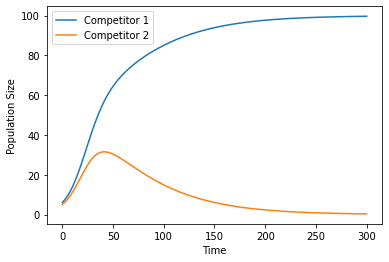

In [63]:
plt.plot(t, sol[:, 0], label = "Competitor 1")
plt.plot(t, sol[:, 1], label = "Competitor 2")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population Size")
plt.show()

In [76]:
parameters = {
    'r': np.array( [0.1, 0.1] ),
    'K': np.array( [100, 100] ),
    'a': np.array( [[0, 1.2],
                    [0.8, 0]])
}

LV = CompetitiveLV(parameters)

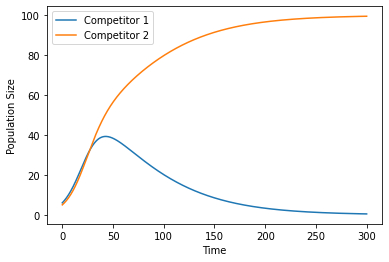

In [77]:
t  = np.linspace(0, 300, 1000)
N0 = np.array([6, 5])
sol = LV.solve(sci.integrate.odeint, N0, t)

In [18]:
sol

array([[  6.        ,   5.        ],
       [  6.08464232,   5.07143572],
       [  6.16928464,   5.14287144],
       ...,
       [175.03071536, 147.65712856],
       [175.11535768, 147.72856428],
       [175.2       , 147.8       ]])